# Aproximaciones de Taylor

In [211]:
import numpy as np

In [212]:
# Gradiente de la función
def gradF(z):
    return np.array([1-np.exp(z[1]-z[0]), np.exp(z[1]-z[0])])

In [213]:
z = np.array([1,2])
print('grad(f)[1,2] = ', gradF(z))

grad(f)[1,2] =  [-1.71828183  2.71828183]


In [214]:
# Función f
def F(x):
    return x[0] + np.exp(x[1]-x[0])

In [215]:
print('f([1,2]) = ', F(z))

f([1,2]) =  3.718281828459045


In [254]:
# Aproximación de Taylor
def taylor_F(x,z):
    fz = F(x)
    gz = gradF(z)
    return fz + gz@(x-z)

In [255]:
print('taylor_F([1,2],[1,2]) = ', taylor_F(z,z))

taylor_F([1,2],[1,2]) =  3.718281828459045



$$
\hat{f}(\mathbf{x}) = 3.7183 + [-1.72\; 2.72]\begin{bmatrix}x_{0}-1\\ x_{1}-2\end{bmatrix}
$$

In [218]:
import matplotlib.pyplot as plt 
from matplotlib import cm


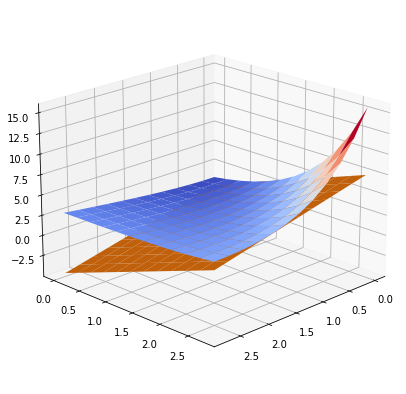

In [271]:
fig, ax = plt.subplots(figsize=(7,7),subplot_kw={"projection": "3d"})

x0 = np.arange(0, 3, 0.25)
x1 = np.arange(0, 3, 0.25)
X0, X1 = np.meshgrid(x0, x1)

X = np.array([X0,X1])
z = np.array([1,2])

FZ = F(X) 
GZ = gradF(z)
Z_taylor = F(z) + (gradF(z)[0]*np.array([X0 - z[0]]))+(gradF(z)[1]*np.array([X1 - z[1]]))
Z_taylor = Z_taylor.reshape(FZ.shape)

surf_Z = ax.plot_surface(X0, X1, FZ, cmap=cm.coolwarm, linewidth=0)
surf_Z_taylor = ax.plot_surface(X0, X1, Z_taylor   ,linewidth=0)


ax.view_init(20, 45)

plt.show()

## Ejercicio 2, unidimensional

In [221]:
def f(x):
    return x**2 - x**3

In [222]:
def df(z):
    return 2*z - 3*z**2

In [223]:
def tf(x,z):
    return f(z) + df(z)*(x-z)

In [224]:
print('f(0.4) = ', f(0.4))

f(0.4) =  0.09600000000000002


In [225]:
print('Df(0.4) = ', df(0.4))

Df(0.4) =  0.31999999999999995


$$
\hat{f}(x) = 0.09600000000000002 + 0.31999999999999995 * (x - 0.4)
$$

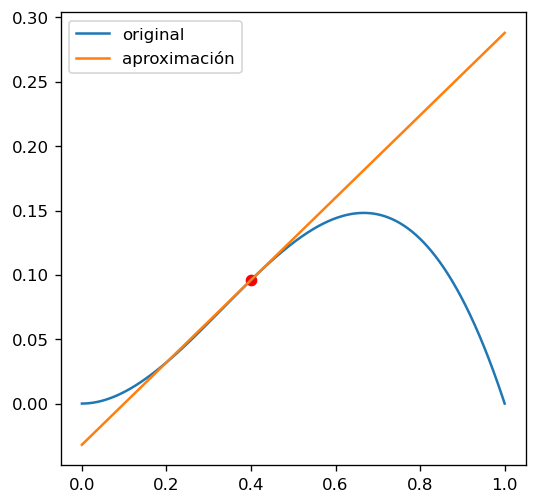

In [226]:
fig, ax = plt.subplots(1,1,figsize=(5,5),dpi=120)

x = np.linspace(0,1,1000)
taf = lambda x:tf(x,0.4)

ax.plot(x,f(x), label='original')
ax.plot(x,taf(x), label='aproximación')
ax.scatter(0.4,f(0.4),color='red')
ax.legend()
plt.show()


In [227]:
## Error de aproximación

In [228]:
def error(x):
    return np.abs(f(x)-taf(x))


In [229]:
print(f'x = {0.3}, f(x) = {f(0.3)}, Taylor f(x) = {taf(0.3)}, |f(x) - Taylor f(x)| = {error(0.3)}')

x = 0.3, f(x) = 0.063, Taylor f(x) = 0.064, |f(x) - Taylor f(x)| = 0.0010000000000000009


In [230]:
def data(x):
    print(f'x = {x}, f(x) = {f(x)}, Taylor f(x) = {taf(x)}, |f(x) - Taylor f(x)| = {error(x)}\n')

In [231]:
for x in np.arange(0,1,0.1):
    data(x)

x = 0.0, f(x) = 0.0, Taylor f(x) = -0.03199999999999996, |f(x) - Taylor f(x)| = 0.03199999999999996

x = 0.1, f(x) = 0.009000000000000001, Taylor f(x) = 1.3877787807814457e-17, |f(x) - Taylor f(x)| = 0.008999999999999987

x = 0.2, f(x) = 0.03200000000000001, Taylor f(x) = 0.03200000000000003, |f(x) - Taylor f(x)| = 2.0816681711721685e-17

x = 0.30000000000000004, f(x) = 0.06300000000000001, Taylor f(x) = 0.06400000000000003, |f(x) - Taylor f(x)| = 0.0010000000000000148

x = 0.4, f(x) = 0.09600000000000002, Taylor f(x) = 0.09600000000000002, |f(x) - Taylor f(x)| = 0.0

x = 0.5, f(x) = 0.125, Taylor f(x) = 0.128, |f(x) - Taylor f(x)| = 0.0030000000000000027

x = 0.6000000000000001, f(x) = 0.144, Taylor f(x) = 0.16000000000000003, |f(x) - Taylor f(x)| = 0.016000000000000042

x = 0.7000000000000001, f(x) = 0.14700000000000002, Taylor f(x) = 0.192, |f(x) - Taylor f(x)| = 0.044999999999999984

x = 0.8, f(x) = 0.128, Taylor f(x) = 0.22399999999999998, |f(x) - Taylor f(x)| = 0.0959999999999999